# Figure 3c. Notebook

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib
import numpy.ma as ma
from matplotlib.colors import LogNorm

# Import Custom GTL plotting scheme
from genometechlab_plotting import setup_style
setup_style('inline')

Loaded 7 Helvetica fonts


## Read Data

In [2]:
# Define Filepaths
dorado_path = '../Exemplar_Data/07_27_23_RNA004_GM12878_polyA_RNA_sup_8mods_polyA.GRCh38.sorted.calmd.filtered.chr2_112157000_114000000.modkit_0.7_threshold.fp_adjusted.tsv'

# Read in files and rename headers
def load_df(path):
    df = pd.read_csv(path, sep = '\t', header = None)
    df.rename(
        columns={
            0: 'Chromosome',
            1: 'Start',
            2: 'End',
            3: 'Call',
            4: 'Score',
            5: 'Strand',
            6: 'Start_1',
            7: 'End_1',
            8: 'RBG',
            9: 'N_valid_cov',
            10: 'Mod_Percent',
            11: 'N_mod',
            12: 'N_canon',
            13: 'N_other_mod',
            14: 'N_delete',
            15: 'N_fail',
            16: 'N_diff',
            17: 'N_no_call',
            18: 'Adjusted_Mod_Proportion'
        },
        inplace = True
    )

    return df

dorado = load_df(dorado_path)


## Filter Data

In [3]:
# Filter the data
dorado = dorado[(dorado['Mod_Percent'] > 0) & (dorado['Adjusted_Mod_Proportion'] > 0) & (dorado['Call'] == 'a') & (dorado['Score'] >= 20)]

## Plotting

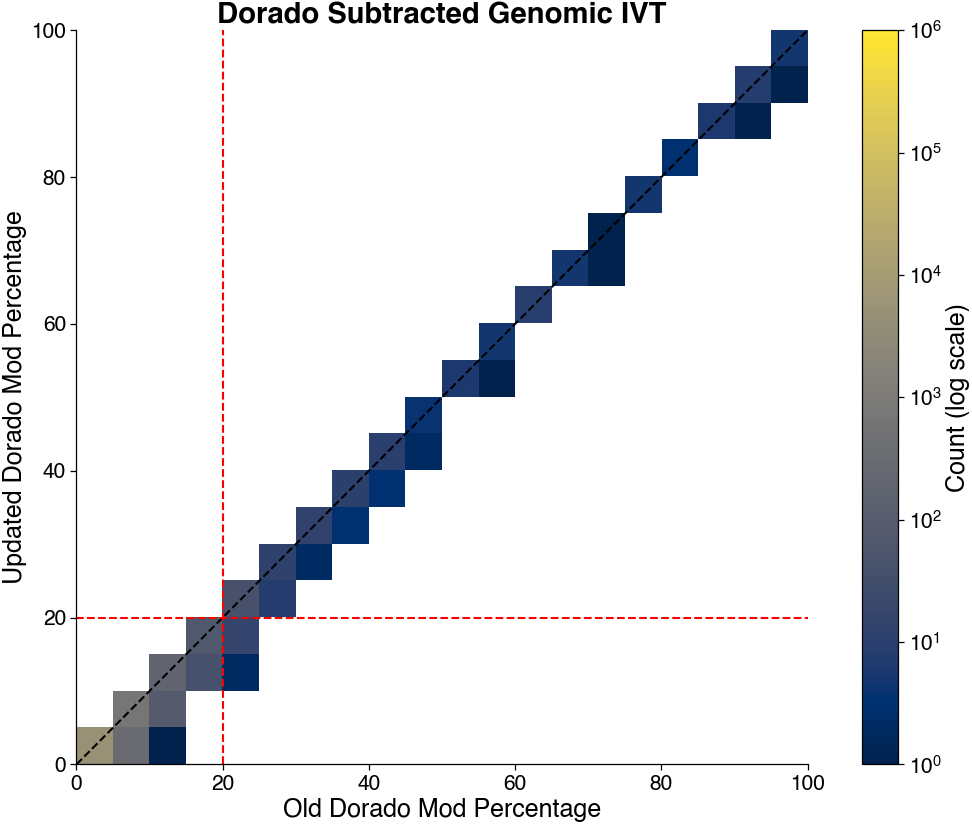

In [4]:
%matplotlib inline

# Extract columns for plotting
fp_adjusted = dorado['Adjusted_Mod_Proportion']
original = dorado['Mod_Percent']

# Set up the histogram bins
bandwidth_2d = 5
bins = np.arange(0, 100 + bandwidth_2d, bandwidth_2d)

# Create the 2D histogram
hist, xedges, yedges = np.histogram2d(original, fp_adjusted, bins=bins)

# Create a masked array where zeros are masked out
masked_hist = ma.masked_where(hist == 0, hist)
im = plt.imshow(masked_hist.T,
                norm=LogNorm(vmin=1, vmax=1e6),  # Log scale from 1 to 10^6
                origin='lower',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                aspect='auto',
                cmap='cividis',
                interpolation='nearest')

# Add colorbar with log scale
cbar = plt.colorbar(im)
cbar.set_label('Count (log scale)')

plt.title('Dorado Subtracted Genomic IVT')
plt.xlabel('Old Dorado Mod Percentage')
plt.ylabel('Updated Dorado Mod Percentage')

# Add y = x line if needed
min_val = min(xedges[0], yedges[0])
max_val = max(xedges[-1], yedges[-1])
plt.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--')
plt.axhline(20, color = 'r', linestyle = '--')
plt.axvline(20, color = 'r', linestyle = '--')

plt.show()